<a href="https://colab.research.google.com/github/qxnqingxueng/wine-quality-classification/blob/main/Project_Assignment_CPC_152_latest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MACHINE LEARNING

In [ ]:
# !conda install -y matplotlib
import numpy as np
import matplotlib.pyplot as plt
#import os.path as osp
import numpy.random as npr
# !conda install pandas=0.16.0
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
cd C:\Users\User\OneDrive - Universiti Sains Malaysia\SEM 2 USM\CPC 152\project

C:\Users\User\OneDrive - Universiti Sains Malaysia\SEM 2 USM\CPC 152\project


In [ ]:
# Read and print the dataset
df = pd.read_csv("winequality.csv")
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [ ]:
# Get summary of numerical variables
# describe() function would provide count, mean, standard deviation (std), min, quartiles and max in its output
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


# DATA CLEANING AND PREPROCESSING

In [ ]:
# Check the number of null in the dataset
df.apply(lambda x: sum(x.isnull()),axis=0)

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [ ]:
df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

Group the wine into 2 classes : Quality >= 7 - Good Wine Quality < 6 - Bad Wine Quality

In [ ]:
# Group the target variable into two classes (1=good, 0=bad)
df['quality_binary'] = df['quality'].apply(lambda x: 1 if x >= 7 else 0)
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,quality_binary
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,0
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,0
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,0
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,0
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,0
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,0


# SPLIT DATA

In [ ]:
from sklearn.model_selection import train_test_split

X = df
y = df['quality_binary']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create a copy of the DataFrame to work from
copy = df.copy()

# Split the data into training and testing sets
train_set = copy.sample(frac=0.7, random_state=42)
test_set = copy.drop(train_set.index)


In [ ]:
train_set

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,quality_binary
803,7.7,0.560,0.08,2.50,0.114,14.0,46.0,0.99710,3.24,0.66,9.6,6,0
124,7.8,0.500,0.17,1.60,0.082,21.0,102.0,0.99600,3.39,0.48,9.5,5,0
350,10.7,0.670,0.22,2.70,0.107,17.0,34.0,1.00040,3.28,0.98,9.9,6,0
682,8.5,0.460,0.31,2.25,0.078,32.0,58.0,0.99800,3.33,0.54,9.8,5,0
1326,6.7,0.460,0.24,1.70,0.077,18.0,34.0,0.99480,3.39,0.60,10.6,6,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
753,8.3,0.650,0.10,2.90,0.089,17.0,40.0,0.99803,3.29,0.55,9.5,5,0
498,10.7,0.350,0.53,2.60,0.070,5.0,16.0,0.99720,3.15,0.65,11.0,8,1
11,7.5,0.500,0.36,6.10,0.071,17.0,102.0,0.99780,3.35,0.80,10.5,5,0
396,6.6,0.735,0.02,7.90,0.122,68.0,124.0,0.99940,3.47,0.53,9.9,5,0


In [ ]:
test_set
# len (test_set)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,quality_binary
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.99680,3.36,0.57,9.5,7,1
13,7.8,0.61,0.29,1.6,0.114,9.0,29.0,0.99740,3.26,1.56,9.1,5,0
14,8.9,0.62,0.18,3.8,0.176,52.0,145.0,0.99860,3.16,0.88,9.2,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1583,6.2,0.46,0.29,2.1,0.074,32.0,98.0,0.99578,3.33,0.62,9.8,5,0
1584,6.7,0.32,0.44,2.4,0.061,24.0,34.0,0.99484,3.29,0.80,11.6,7,1
1595,5.9,0.55,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,0
1596,6.3,0.51,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,0


In [ ]:
# Import to csv file
train_set.to_csv('train_set.csv')
test_set.to_csv('test_set.csv')

# FEATURES SELECTION

Feature selection using Feature Importance

In [ ]:
data = pd.read_csv("train_set.csv")

In [ ]:
X = data.iloc[:,1:12]  #features
y = data.iloc[:,-1]    #target column / label

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt

model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers

[0.07967652 0.10578162 0.09581438 0.07019274 0.06540486 0.06735521
 0.08088161 0.0835177  0.07038654 0.11376326 0.16722556]


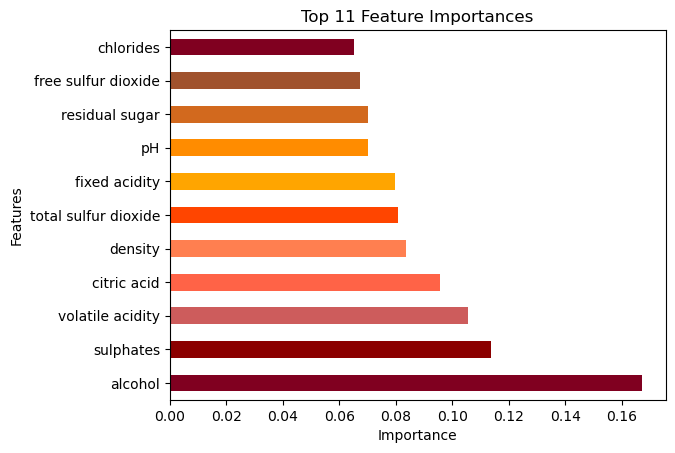

In [ ]:
#plot graph of feature importances for better visualization
colors = ['#800020', '#8B0000', '#CD5C5C', '#FF6347', '#FF7F50', '#FF4500', '#FFA500', '#FF8C00', '#D2691E', '#A0522D']
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(11).plot(kind='barh', color=colors)
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Top 11 Feature Importances')
plt.show()

# 1. K Neighbors Classifier

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

## 2 Best Features

In [ ]:
# Split the dataset into features (X) and target variable (y)
X = df[['sulphates', 'alcohol']]
y = df['quality_binary']

In [ ]:
#Split the data into training (70%) and testing sets (30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
# Create a KNN classifier object
knn = KNeighborsClassifier(n_neighbors=5)

# Train the KNN model
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
# Make predictions on the test set
y_pred = knn.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,

In [ ]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Calculate precision
precision = precision_score(y_test, y_pred)
print("Precision:", precision)

# Calculate recall
recall = recall_score(y_test, y_pred)
print("Recall:", recall)

# Calculate F1 score
f1 = f1_score(y_test, y_pred)
print("F1 Score:", f1)

# Calculate confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", confusion_mat)

Accuracy: 0.8479166666666667
Precision: 0.4318181818181818
Recall: 0.2835820895522388
F1 Score: 0.34234234234234234
Confusion Matrix:
 [[388  25]
 [ 48  19]]


## 3 Features

In [ ]:
X = df[['fixed acidity','sulphates', 'alcohol']]
y = df['quality_binary']

In [ ]:
#Split the data into training (70%) and testing sets (30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
# Create a KNN classifier object
knn = KNeighborsClassifier(n_neighbors=5)

# Train the KNN model
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Calculate precision
precision = precision_score(y_test, y_pred)
print("Precision:", precision)

# Calculate recall
recall = recall_score(y_test, y_pred)
print("Recall:", recall)

# Calculate F1 score
f1 = f1_score(y_test, y_pred)
print("F1 Score:", f1)

# Calculate confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", confusion_mat)

Accuracy: 0.8479166666666667
Precision: 0.4318181818181818
Recall: 0.2835820895522388
F1 Score: 0.34234234234234234
Confusion Matrix:
 [[388  25]
 [ 48  19]]


## 4 Features

In [ ]:
X = df[['fixed acidity','volatile acidity','sulphates', 'alcohol']]
y = df['quality_binary']

In [ ]:
#Split the data into training (70%) and testing sets (30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
# Create a KNN classifier object
knn = KNeighborsClassifier(n_neighbors=5)

# Train the KNN model
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
# Make predictions on the test set
y_pred = knn.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0,

In [ ]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Calculate precision
precision = precision_score(y_test, y_pred)
print("Precision:", precision)

# Calculate recall
recall = recall_score(y_test, y_pred)
print("Recall:", recall)

# Calculate F1 score
f1 = f1_score(y_test, y_pred)
print("F1 Score:", f1)

# Calculate confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", confusion_mat)

Accuracy: 0.8458333333333333
Precision: 0.4339622641509434
Recall: 0.34328358208955223
F1 Score: 0.3833333333333333
Confusion Matrix:
 [[383  30]
 [ 44  23]]


## 5 Features

In [ ]:
X = df[['fixed acidity','volatile acidity','citric acid','sulphates', 'alcohol']]
y = df['quality_binary']

In [ ]:
#Split the data into training (70%) and testing sets (30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
# Create a KNN classifier object
knn = KNeighborsClassifier(n_neighbors=5)

# Train the KNN model
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
# Make predictions on the test set
y_pred = knn.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0,

In [ ]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Calculate precision
precision = precision_score(y_test, y_pred)
print("Precision:", precision)

# Calculate recall
recall = recall_score(y_test, y_pred)
print("Recall:", recall)

# Calculate F1 score
f1 = f1_score(y_test, y_pred)
print("F1 Score:", f1)

# Calculate confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", confusion_mat)

Accuracy: 0.8354166666666667
Precision: 0.39655172413793105
Recall: 0.34328358208955223
F1 Score: 0.368
Confusion Matrix:
 [[378  35]
 [ 44  23]]


## 6 Features

In [ ]:
X = df[['fixed acidity','volatile acidity','citric acid','free sulfur dioxide','sulphates', 'alcohol']]
y = df['quality_binary']

In [ ]:
#Split the data into training (70%) and testing sets (30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
# Create a KNN classifier object
knn = KNeighborsClassifier(n_neighbors=5)

# Train the KNN model
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
# Make predictions on the test set
y_pred = knn.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [ ]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Calculate precision
precision = precision_score(y_test, y_pred)
print("Precision:", precision)

# Calculate recall
recall = recall_score(y_test, y_pred)
print("Recall:", recall)

# Calculate F1 score
f1 = f1_score(y_test, y_pred)
print("F1 Score:", f1)

# Calculate confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", confusion_mat)

Accuracy: 0.85625
Precision: 0.4642857142857143
Recall: 0.19402985074626866
F1 Score: 0.2736842105263158
Confusion Matrix:
 [[398  15]
 [ 54  13]]


## 7 Features

In [ ]:
X = df[['fixed acidity','volatile acidity','citric acid','free sulfur dioxide','total sulfur dioxide','sulphates', 'alcohol']]
y = df['quality_binary']

In [ ]:
#Split the data into training (70%) and testing sets (30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
# Create a KNN classifier object
knn = KNeighborsClassifier(n_neighbors=5)

# Train the KNN model
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
# Make predictions on the test set
y_pred = knn.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [ ]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Calculate precision
precision = precision_score(y_test, y_pred)
print("Precision:", precision)

# Calculate recall
recall = recall_score(y_test, y_pred)
print("Recall:", recall)

# Calculate F1 score
f1 = f1_score(y_test, y_pred)
print("F1 Score:", f1)

# Calculate confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", confusion_mat)

Accuracy: 0.88125
Precision: 0.65625
Recall: 0.31343283582089554
F1 Score: 0.42424242424242425
Confusion Matrix:
 [[402  11]
 [ 46  21]]


### 8 Features

In [ ]:
X = df[['fixed acidity','volatile acidity','citric acid','free sulfur dioxide','total sulfur dioxide','sulphates', 'alcohol', 'density']]
y = df['quality_binary']

In [ ]:
#Split the data into training (70%) and testing sets (30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
# Create a KNN classifier object
knn = KNeighborsClassifier(n_neighbors=5)

# Train the KNN model
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
# Make predictions on the test set
y_pred = knn.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [ ]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Calculate precision
precision = precision_score(y_test, y_pred)
print("Precision:", precision)

# Calculate recall
recall = recall_score(y_test, y_pred)
print("Recall:", recall)

# Calculate F1 score
f1 = f1_score(y_test, y_pred)
print("F1 Score:", f1)

# Calculate confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", confusion_mat)

Accuracy: 0.88125
Precision: 0.65625
Recall: 0.31343283582089554
F1 Score: 0.42424242424242425
Confusion Matrix:
 [[402  11]
 [ 46  21]]


### 9 Features

In [ ]:
X = df[['fixed acidity','volatile acidity','citric acid','free sulfur dioxide','total sulfur dioxide','sulphates', 'alcohol', 'density', 'residual sugar']]
y = df['quality_binary']

In [ ]:
#Split the data into training (70%) and testing sets (30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
# Create a KNN classifier object
knn = KNeighborsClassifier(n_neighbors=5)

# Train the KNN model
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
# Make predictions on the test set
y_pred = knn.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [ ]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Calculate precision
precision = precision_score(y_test, y_pred)
print("Precision:", precision)

# Calculate recall
recall = recall_score(y_test, y_pred)
print("Recall:", recall)

# Calculate F1 score
f1 = f1_score(y_test, y_pred)
print("F1 Score:", f1)

# Calculate confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", confusion_mat)

Accuracy: 0.8604166666666667
Precision: 0.5
Recall: 0.19402985074626866
F1 Score: 0.2795698924731183
Confusion Matrix:
 [[400  13]
 [ 54  13]]


### 10 Features

In [ ]:
X = df[['fixed acidity','volatile acidity','citric acid','free sulfur dioxide','total sulfur dioxide','sulphates', 'alcohol', 'density', 'residual sugar','pH']]
y = df['quality_binary']

In [ ]:
#Split the data into training (70%) and testing sets (30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
# Create a KNN classifier object
knn = KNeighborsClassifier(n_neighbors=5)

# Train the KNN model
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
# Make predictions on the test set
y_pred = knn.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [ ]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Calculate precision
precision = precision_score(y_test, y_pred)
print("Precision:", precision)

# Calculate recall
recall = recall_score(y_test, y_pred)
print("Recall:", recall)

# Calculate F1 score
f1 = f1_score(y_test, y_pred)
print("F1 Score:", f1)

# Calculate confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", confusion_mat)

Accuracy: 0.8583333333333333
Precision: 0.48148148148148145
Recall: 0.19402985074626866
F1 Score: 0.276595744680851
Confusion Matrix:
 [[399  14]
 [ 54  13]]


# 2. Decision Tree

### 2 Best Features

In [ ]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.model_selection import train_test_split

# Split the dataset into features (X) and target variable (y)
X = df[['sulphates', 'alcohol']]
y = df['quality_binary']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create and train the decision tree classifier
model = DecisionTreeClassifier(criterion="gini")
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,

In [ ]:
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Calculate precision
precision = precision_score(y_test, y_pred)
print("Precision:", precision)

# Calculate recall
recall = recall_score(y_test, y_pred)
print("Recall:", recall)

# Calculate F1 score
f1 = f1_score(y_test, y_pred)
print("F1 Score:", f1)

# Calculate confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", confusion_mat)

Accuracy: 0.8125
Precision: 0.3333333333333333
Recall: 0.34328358208955223
F1 Score: 0.338235294117647
Confusion Matrix:
 [[367  46]
 [ 44  23]]


## 3 Features

In [ ]:
# Split the dataset into features (X) and target variable (y)
X = df[['total sulfur dioxide','sulphates', 'alcohol']]
y = df['quality_binary']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=4)

# Create and train the decision tree classifier
model = DecisionTreeClassifier(criterion="gini")
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [ ]:
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Calculate precision
precision = precision_score(y_test, y_pred)
print("Precision:", precision)

# Calculate recall
recall = recall_score(y_test, y_pred)
print("Recall:", recall)

# Calculate F1 score
f1 = f1_score(y_test, y_pred)
print("F1 Score:", f1)

# Calculate confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", confusion_mat)

Accuracy: 0.8604166666666667
Precision: 0.4939759036144578
Recall: 0.6212121212121212
F1 Score: 0.5503355704697986
Confusion Matrix:
 [[372  42]
 [ 25  41]]


## 4 Features

In [ ]:
# Split the dataset into features (X) and target variable (y)
X = df[['total sulfur dioxide','volatile acidity','sulphates', 'alcohol']]
y = df['quality_binary']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=4)

# Create and train the decision tree classifier
model = DecisionTreeClassifier(criterion="gini")
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)
y_pred

array([0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,

In [ ]:
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Calculate precision
precision = precision_score(y_test, y_pred)
print("Precision:", precision)

# Calculate recall
recall = recall_score(y_test, y_pred)
print("Recall:", recall)

# Calculate F1 score
f1 = f1_score(y_test, y_pred)
print("F1 Score:", f1)

# Calculate confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", confusion_mat)

Accuracy: 0.85625
Precision: 0.4819277108433735
Recall: 0.6060606060606061
F1 Score: 0.5369127516778522
Confusion Matrix:
 [[371  43]
 [ 26  40]]


### 4 Features

In [ ]:
# Split the dataset into features (X) and target variable (y)
X = df[['total sulfur dioxide','volatile acidity','sulphates', 'alcohol','citric acid']]
y = df['quality_binary']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
42
# Create and train the decision tree classifier
model = DecisionTreeClassifier(criterion="gini")
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)
y_pred

NameError: name 'df' is not defined

In [ ]:
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Calculate precision
precision = precision_score(y_test, y_pred)
print("Precision:", precision)

# Calculate recall
recall = recall_score(y_test, y_pred)
print("Recall:", recall)

# Calculate F1 score
f1 = f1_score(y_test, y_pred)
print("F1 Score:", f1)

# Calculate confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", confusion_mat)

Accuracy: 0.85625
Precision: 0.4819277108433735
Recall: 0.6060606060606061
F1 Score: 0.5369127516778522
Confusion Matrix:
 [[371  43]
 [ 26  40]]


### 5 Features

In [ ]:
# Split the dataset into features (X) and target variable (y)
X = df[['total sulfur dioxide','volatile acidity','sulphates', 'alcohol','citric acid','density']]
y = df['quality_binary']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
42
# Create and train the decision tree classifier
model = DecisionTreeClassifier(criterion="gini")
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)
y_pred

NameError: name 'df' is not defined

In [ ]:
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Calculate precision
precision = precision_score(y_test, y_pred)
print("Precision:", precision)

# Calculate recall
recall = recall_score(y_test, y_pred)
print("Recall:", recall)

# Calculate F1 score
f1 = f1_score(y_test, y_pred)
print("F1 Score:", f1)

# Calculate confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", confusion_mat)

Accuracy: 0.85625
Precision: 0.4819277108433735
Recall: 0.6060606060606061
F1 Score: 0.5369127516778522
Confusion Matrix:
 [[371  43]
 [ 26  40]]


### 6 Features

In [ ]:
# Split the dataset into features (X) and target variable (y)
X = df[['total sulfur dioxide','volatile acidity','sulphates', 'alcohol','citric acid','density','fixed acidity']]
y = df['quality_binary']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
42
# Create and train the decision tree classifier
model = DecisionTreeClassifier(criterion="gini")
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)
y_pred

NameError: name 'df' is not defined

In [ ]:
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Calculate precision
precision = precision_score(y_test, y_pred)
print("Precision:", precision)

# Calculate recall
recall = recall_score(y_test, y_pred)
print("Recall:", recall)

# Calculate F1 score
f1 = f1_score(y_test, y_pred)
print("F1 Score:", f1)

# Calculate confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", confusion_mat)

Accuracy: 0.85625
Precision: 0.4819277108433735
Recall: 0.6060606060606061
F1 Score: 0.5369127516778522
Confusion Matrix:
 [[371  43]
 [ 26  40]]


### 7 Features

In [ ]:
# Split the dataset into features (X) and target variable (y)
X = df[['total sulfur dioxide','volatile acidity','sulphates', 'alcohol','citric acid','density','fixed acidity','pH']]
y = df['quality_binary']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
42
# Create and train the decision tree classifier
model = DecisionTreeClassifier(criterion="gini")
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)
y_pred

NameError: name 'df' is not defined

In [ ]:
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Calculate precision
precision = precision_score(y_test, y_pred)
print("Precision:", precision)

# Calculate recall
recall = recall_score(y_test, y_pred)
print("Recall:", recall)

# Calculate F1 score
f1 = f1_score(y_test, y_pred)
print("F1 Score:", f1)

# Calculate confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", confusion_mat)

Accuracy: 0.85625
Precision: 0.4819277108433735
Recall: 0.6060606060606061
F1 Score: 0.5369127516778522
Confusion Matrix:
 [[371  43]
 [ 26  40]]


### 8 Features

In [ ]:
# Split the dataset into features (X) and target variable (y)
X = df[['total sulfur dioxide','volatile acidity','sulphates', 'alcohol','citric acid','density','fixed acidity','pH']]
y = df['quality_binary']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
42
# Create and train the decision tree classifier
model = DecisionTreeClassifier(criterion="gini")
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)
y_pred

NameError: name 'df' is not defined

In [ ]:
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Calculate precision
precision = precision_score(y_test, y_pred)
print("Precision:", precision)

# Calculate recall
recall = recall_score(y_test, y_pred)
print("Recall:", recall)

# Calculate F1 score
f1 = f1_score(y_test, y_pred)
print("F1 Score:", f1)

# Calculate confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", confusion_mat)

Accuracy: 0.85625
Precision: 0.4819277108433735
Recall: 0.6060606060606061
F1 Score: 0.5369127516778522
Confusion Matrix:
 [[371  43]
 [ 26  40]]


### 9 Features

In [ ]:
# Split the dataset into features (X) and target variable (y)
X = df[['total sulfur dioxide','volatile acidity','sulphates', 'alcohol','citric acid','density','fixed acidity','pH', 'residual sugar']]
y = df['quality_binary']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
42
# Create and train the decision tree classifier
model = DecisionTreeClassifier(criterion="gini")
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)
y_pred

NameError: name 'df' is not defined

In [ ]:
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Calculate precision
precision = precision_score(y_test, y_pred)
print("Precision:", precision)

# Calculate recall
recall = recall_score(y_test, y_pred)
print("Recall:", recall)

# Calculate F1 score
f1 = f1_score(y_test, y_pred)
print("F1 Score:", f1)

# Calculate confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", confusion_mat)

### 10 Features

In [ ]:
# Split the dataset into features (X) and target variable (y)
X = df[['total sulfur dioxide','volatile acidity','sulphates', 'alcohol','citric acid','density','fixed acidity','pH', 'residual sugar','free sulfur dioxide']]
y = df['quality_binary']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
42
# Create and train the decision tree classifier
model = DecisionTreeClassifier(criterion="gini")
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)
y_pred

NameError: name 'df' is not defined

In [ ]:
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Calculate precision
precision = precision_score(y_test, y_pred)
print("Precision:", precision)

# Calculate recall
recall = recall_score(y_test, y_pred)
print("Recall:", recall)

# Calculate F1 score
f1 = f1_score(y_test, y_pred)
print("F1 Score:", f1)

# Calculate confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", confusion_mat)

# 3. Support Vector Machines (SVM)

In [ ]:
from sklearn import svm
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import StandardScaler

## Compare 3 types of svm

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn import svm
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import StandardScaler

Saving winequality.csv to winequality (2).csv


In [ ]:
from google.colab import files
uploaded = files.upload()

In [ ]:
# Read and print the dataset
df = pd.read_csv("winequality.csv")
df.head()

In [ ]:
# Group the target variable into two classes
df['quality_binary'] = df['quality'].apply(lambda x: 1 if x >= 7 else 0)
df.head()

## Feature selection

Feature selection using Feature Importance

In [ ]:
# Feature matrix in a object named X
X = df[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
        'chlorides', 'free sulfur dioxide', 'total sulfur dioxide',
        'density', 'pH', 'sulphates', 'alcohol', 'quality']]
# response vector in a object named y
y = df[['quality_binary']]

In [ ]:
X = df.iloc[:,0:11]  #features
y = df.iloc[:,-1]    #target column / label

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt

rbf3 = ExtraTreesClassifier()
rbf3.fit(X,y)
print(rbf3.feature_importances_) #use inbuilt class feature_importances of tree based classifiers

[0.07767609 0.09746002 0.09777648 0.07398731 0.06998224 0.06922797
 0.08054207 0.08443528 0.06602234 0.10843822 0.17445197]


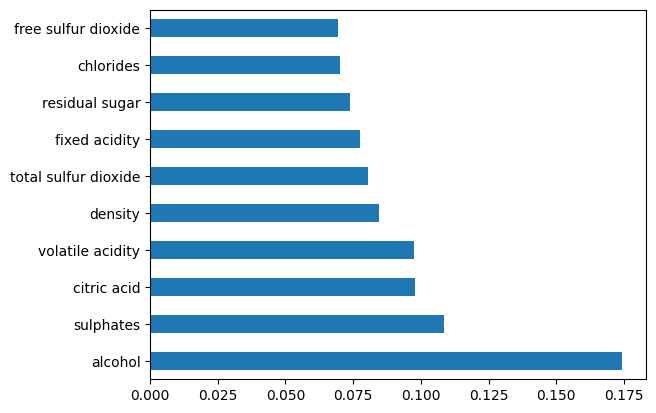

In [ ]:
#plot graph of feature importances for better visualization
feat_importances = pd.Series(rbf3.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

## Data splitting

In [ ]:
# Split the dataset into features (X) and target variable (y)
# choose top 5 features
X = df[['alcohol', 'sulphates', 'volatile acidity', 'citric acid' , 'total sulfur dioxide']]
y = df['quality_binary']

In [ ]:
# Split the data into training (70%) and testing sets (30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
print(X.shape)
print(y.shape)

## 5 Features

### Linear Kernel SVM

In [ ]:
# Split the dataset into features (X) and target variable (y)
# Choose top 5 features
X = df[['alcohol', 'sulphates', 'volatile acidity', 'citric acid', 'total sulfur dioxide']]
y = df['quality_binary']

In [ ]:
# Split the data into training (70%) and testing sets (30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Define a list of C values to test
C_values = [0.01, 0.1, 1.0]

for C in C_values:
    # Create an SVM classifier with a linear kernel and the current C value
    linear5 = svm.SVC(kernel='linear', C=C)

    # Train the classifier on the training data
    linear5.fit(X_train, y_train)

    # Make predictions on the test data
    y_pred = linear5.predict(X_test)

    # Calculate the accuracy of the classifier
    accuracy = accuracy_score(y_test, y_pred)

    print("C =", C, "Accuracy:", accuracy)


C = 0.01 Accuracy: 0.8604166666666667
C = 0.1 Accuracy: 0.8604166666666667
C = 1.0 Accuracy: 0.8604166666666667


In [ ]:
#Feature scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [ ]:
# Train the SVM model
from sklearn import svm
linear5 = svm.SVC(kernel='linear', probability=True)
linear5.fit(X_train, y_train)

SVC(kernel='linear', probability=True)

In [ ]:
# Get the predicted probabilities for each class
predicted_probabilities = linear5.predict_proba(X_test)

# Extract the probabilities for the positive class
positive_probabilities = predicted_probabilities[:, 1]

# Set a threshold value
threshold = 0.35

# Convert probabilities to predicted labels based on the threshold
predictions = np.where(positive_probabilities >= threshold, 1, 0)


In [ ]:
# Calculate accuracy
accuracyL5 = accuracy_score(y_test, predictions)
print("Accuracy:", accuracyL5)

# Calculate precision
precision = precision_score(y_test, predictions, zero_division=0)
print("Precision:", precision)

# Calculate recall
recall = recall_score(y_test, predictions)
print("Recall:", recall)

# Calculate F1 score
f1 = f1_score(y_test, predictions)
print("F1 Score:", f1)

# Calculate confusion matrix
confusion_mat = confusion_matrix(y_test, predictions)
print("Confusion Matrix:\n", confusion_mat)

Accuracy: 0.8625
Precision: 0.5111111111111111
Recall: 0.34328358208955223
F1 Score: 0.4107142857142857
Confusion Matrix:
 [[391  22]
 [ 44  23]]


### Polynomial Kernel SVM

In [ ]:
# Split the dataset into features (X) and target variable (y)
# Choose top 5 features
X = df[['alcohol', 'sulphates', 'volatile acidity', 'citric acid', 'total sulfur dioxide']]
y = df['quality_binary']

In [ ]:
# Split the data into training (70%) and testing sets (30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Finding the best degree

In [ ]:
degrees = [1, 2, 3, 4, 5]

for degree in degrees:
    # Create the SVM classifier with a polynomial kernel
    poly5 = SVC(kernel='poly', degree=degree, random_state=42)

    # Train the classifier
    poly5.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = poly5.predict(X_test)

    # Evaluate the accuracy of the model
    accuracy = accuracy_score(y_test, y_pred)
    print("Degree:", degree, "Accuracy:", accuracy)

Degree: 1 Accuracy: 0.8604166666666667
Degree: 2 Accuracy: 0.8604166666666667
Degree: 3 Accuracy: 0.8708333333333333
Degree: 4 Accuracy: 0.8666666666666667
Degree: 5 Accuracy: 0.8604166666666667


In [ ]:
poly5 = SVC(kernel='poly', degree = 3)
poly5.fit(X_train, y_train)

SVC(kernel='poly')

In [ ]:
# Make predictions on the test set
predictions = poly5.predict(X_test)
predictions

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [ ]:
# Calculate accuracy
accuracyP5 = accuracy_score(y_test, predictions)
print("Accuracy:", accuracyP5)

# Calculate precision
precision = precision_score(y_test, predictions)
print("Precision:", precision)

# Calculate recall
recall = recall_score(y_test, predictions)
print("Recall:", recall)

# Calculate F1 score
f1 = f1_score(y_test, predictions)
print("F1 Score:", f1)

# Calculate confusion matrix
confusion_mat = confusion_matrix(y_test, predictions)
print("Confusion Matrix:\n", confusion_mat)

Accuracy: 0.8708333333333333
Precision: 0.6
Recall: 0.22388059701492538
F1 Score: 0.32608695652173914
Confusion Matrix:
 [[403  10]
 [ 52  15]]


### Radial Basis Function Kernel

In [ ]:
# Split the dataset into features (X) and target variable (y)
# Choose top 5 features
X = df[['alcohol', 'sulphates', 'volatile acidity', 'citric acid', 'total sulfur dioxide']]
y = df['quality_binary']

In [ ]:
# Split the data into training (70%) and testing sets (30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Finding the best gamma and C value

In [ ]:
gamma_values = [0.01, 0.1, 1, 10]
C_values = [0.01, 0.1, 1, 10]

for gamma in gamma_values:
    for C in C_values:
        # Create an SVM classifier with RBF kernel
        rbf5 = SVC(kernel='rbf', gamma=gamma, C=C)

        # Train the model
        rbf5.fit(X_train, y_train)

        # Make predictions on the test set
        y_pred = rbf5.predict(X_test)

        # Calculate the accuracy
        accuracy = accuracy_score(y_test, y_pred)



        # Print the results
        print("Gamma={}, C={}: Accuracy={}".format(gamma, C, accuracy))
    print ("=======")

Gamma=0.01, C=0.01: Accuracy=0.8604166666666667
Gamma=0.01, C=0.1: Accuracy=0.8604166666666667
Gamma=0.01, C=1: Accuracy=0.8604166666666667
Gamma=0.01, C=10: Accuracy=0.8625
Gamma=0.1, C=0.01: Accuracy=0.8604166666666667
Gamma=0.1, C=0.1: Accuracy=0.8604166666666667
Gamma=0.1, C=1: Accuracy=0.86875
Gamma=0.1, C=10: Accuracy=0.8625
Gamma=1, C=0.01: Accuracy=0.8604166666666667
Gamma=1, C=0.1: Accuracy=0.8604166666666667
Gamma=1, C=1: Accuracy=0.875
Gamma=1, C=10: Accuracy=0.8895833333333333
Gamma=10, C=0.01: Accuracy=0.8604166666666667
Gamma=10, C=0.1: Accuracy=0.8604166666666667
Gamma=10, C=1: Accuracy=0.8916666666666667
Gamma=10, C=10: Accuracy=0.8833333333333333


In [ ]:
rbf5 = SVC(kernel='rbf', gamma = 10.0, C=1.0)
rbf5.fit(X_train, y_train)

SVC(gamma=10.0)

In [ ]:
# Make predictions on the test set
predictions = rbf5.predict(X_test)
predictions

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,

In [ ]:
# Calculate accuracy
accuracyR5 = accuracy_score(y_test, predictions)
print("Accuracy:", accuracyR5)

# Calculate precision
precision = precision_score(y_test, predictions)
print("Precision:", precision)

# Calculate recall
recall = recall_score(y_test, predictions)
print("Recall:", recall)

# Calculate F1 score
f1 = f1_score(y_test, predictions)
print("F1 Score:", f1)

# Calculate confusion matrix
confusion_mat = confusion_matrix(y_test, predictions)
print("Confusion Matrix:\n", confusion_mat)

Accuracy: 0.8916666666666667
Precision: 0.9411764705882353
Recall: 0.23880597014925373
F1 Score: 0.38095238095238093
Confusion Matrix:
 [[412   1]
 [ 51  16]]


## 4 Features

### Linear Kernel SVM

In [ ]:
# Split the dataset into features (X) and target variable (y)
# Choose top 4 features
X = df[['alcohol', 'sulphates', 'volatile acidity', 'citric acid']]
y = df['quality_binary']

In [ ]:
# Split the data into training (70%) and testing sets (30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Define a list of C values to test
C_values = [0.01, 0.1, 1.0]

for C in C_values:
    # Create an SVM classifier with a linear kernel and the current C value
    linear4 = svm.SVC(kernel='linear', C=C)

    # Train the classifier on the training data
    linear4.fit(X_train, y_train)

    # Make predictions on the test data
    y_pred = linear4.predict(X_test)

    # Calculate the accuracy of the classifier
    accuracy = accuracy_score(y_test, y_pred)

    print("C =", C, "Accuracy:", accuracy)


C = 0.01 Accuracy: 0.8604166666666667
C = 0.1 Accuracy: 0.8604166666666667
C = 1.0 Accuracy: 0.8604166666666667


In [ ]:
#Feature scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [ ]:
# Train the SVM model
from sklearn import svm
linear4 = svm.SVC(kernel='linear', C=1.0)
linear4.fit(X_train, y_train)

SVC(kernel='linear')

In [ ]:
# Make predictions on the test set
predictions = linear4.predict(X_test)
predictions

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [ ]:
# Calculate accuracy
accuracyL4 = accuracy_score(y_test, predictions)
print("Accuracy:", accuracyL4)

# Calculate precision
precision = precision_score(y_test, predictions)
print("Precision:", precision)

# Calculate recall
recall = recall_score(y_test, predictions)
print("Recall:", recall)

# Calculate F1 score
f1 = f1_score(y_test, predictions)
print("F1 Score:", f1)

# Calculate confusion matrix
confusion_mat = confusion_matrix(y_test, predictions)
print("Confusion Matrix:\n", confusion_mat)

Accuracy: 0.8604166666666667
Precision: 0.0
Recall: 0.0
F1 Score: 0.0
Confusion Matrix:
 [[413   0]
 [ 67   0]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Polynomial Kernel SVM

In [ ]:
# Split the dataset into features (X) and target variable (y)
# Choose top 4 features
X = df[['alcohol', 'sulphates', 'volatile acidity', 'citric acid']]
y = df['quality_binary']

In [ ]:
# Split the data into training (70%) and testing sets (30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

FInding the best degree

In [ ]:
degrees = [1, 2, 3, 4, 5]

for degree in degrees:
    # Create the SVM classifier with a polynomial kernel
    poly4 = SVC(kernel='poly', degree=degree, random_state=42)

    # Train the classifier
    poly4.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = poly4.predict(X_test)

    # Evaluate the accuracy of the model
    accuracy = accuracy_score(y_test, y_pred)
    print("Degree:", degree, "Accuracy:", accuracy)

Degree: 1 Accuracy: 0.8604166666666667
Degree: 2 Accuracy: 0.8604166666666667
Degree: 3 Accuracy: 0.8645833333333334
Degree: 4 Accuracy: 0.8645833333333334
Degree: 5 Accuracy: 0.8729166666666667


In [ ]:
poly4 = SVC(kernel='poly', degree = 5)
poly4.fit(X_train, y_train)

SVC(degree=5, kernel='poly')

In [ ]:
# Make predictions on the test set
predictions = poly4.predict(X_test)
predictions

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [ ]:
# Calculate accuracy
accuracyP4 = accuracy_score(y_test, predictions)
print("Accuracy:", accuracyP4)

# Calculate precision
precision = precision_score(y_test, predictions)
print("Precision:", precision)

# Calculate recall
recall = recall_score(y_test, predictions)
print("Recall:", recall)

# Calculate F1 score
f1 = f1_score(y_test, predictions)
print("F1 Score:", f1)

# Calculate confusion matrix
confusion_mat = confusion_matrix(y_test, predictions)
print("Confusion Matrix:\n", confusion_mat)

Accuracy: 0.8729166666666667
Precision: 0.6363636363636364
Recall: 0.208955223880597
F1 Score: 0.3146067415730337
Confusion Matrix:
 [[405   8]
 [ 53  14]]


### Radial Basis Function Kernel

In [ ]:
# Split the dataset into features (X) and target variable (y)
# Choose top 4 features
X = df[['alcohol', 'sulphates', 'volatile acidity', 'citric acid']]
y = df['quality_binary']

In [ ]:
# Split the data into training (70%) and testing sets (30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Finding the best gamma and C value

In [ ]:
gamma_values = [0.01, 0.1, 1, 10]
C_values = [0.01, 0.1, 1, 10]

for gamma in gamma_values:
    for C in C_values:
        # Create an SVM classifier with RBF kernel
        rbf4 = SVC(kernel='rbf', gamma=gamma, C=C)

        # Train the model
        rbf4.fit(X_train, y_train)

        # Make predictions on the test set
        y_pred = rbf4.predict(X_test)

        # Calculate the accuracy
        accuracy = accuracy_score(y_test, y_pred)



        # Print the results
        print("Gamma={}, C={}: Accuracy={}".format(gamma, C, accuracy))
    print ("=======")

Gamma=0.01, C=0.01: Accuracy=0.8604166666666667
Gamma=0.01, C=0.1: Accuracy=0.8604166666666667
Gamma=0.01, C=1: Accuracy=0.8604166666666667
Gamma=0.01, C=10: Accuracy=0.8604166666666667
Gamma=0.1, C=0.01: Accuracy=0.8604166666666667
Gamma=0.1, C=0.1: Accuracy=0.8604166666666667
Gamma=0.1, C=1: Accuracy=0.86875
Gamma=0.1, C=10: Accuracy=0.8583333333333333
Gamma=1, C=0.01: Accuracy=0.8604166666666667
Gamma=1, C=0.1: Accuracy=0.8645833333333334
Gamma=1, C=1: Accuracy=0.8645833333333334
Gamma=1, C=10: Accuracy=0.8708333333333333
Gamma=10, C=0.01: Accuracy=0.8604166666666667
Gamma=10, C=0.1: Accuracy=0.8604166666666667
Gamma=10, C=1: Accuracy=0.8770833333333333
Gamma=10, C=10: Accuracy=0.8666666666666667


In [ ]:
rbf4 = SVC(kernel='rbf', gamma = 10.0, C=1.0)
rbf4.fit(X_train, y_train)

SVC(gamma=10.0)

In [ ]:
# Make predictions on the test set
predictions = rbf4.predict(X_test)
predictions

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,

In [ ]:
# Calculate accuracy
accuracyR4 = accuracy_score(y_test, predictions)
print("Accuracy:", accuracyR4)

# Calculate precision
precision = precision_score(y_test, predictions)
print("Precision:", precision)

# Calculate recall
recall = recall_score(y_test, predictions)
print("Recall:", recall)

# Calculate F1 score
f1 = f1_score(y_test, predictions)
print("F1 Score:", f1)

# Calculate confusion matrix
confusion_mat = confusion_matrix(y_test, predictions)
print("Confusion Matrix:\n", confusion_mat)

Accuracy: 0.8770833333333333
Precision: 0.6538461538461539
Recall: 0.2537313432835821
F1 Score: 0.3655913978494624
Confusion Matrix:
 [[404   9]
 [ 50  17]]


## 3 Features

### Linear Kernel SVM

In [ ]:
# Split the dataset into features (X) and target variable (y)
# Choose top 3 features
X = df[['alcohol', 'sulphates', 'volatile acidity']]
y = df['quality_binary']

In [ ]:
# Split the data into training (70%) and testing sets (30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Define a list of C values to test
C_values = [0.01, 0.1, 1.0]

for C in C_values:
    # Create an SVM classifier with a linear kernel and the current C value
    linear3 = svm.SVC(kernel='linear', C=C)

    # Train the classifier on the training data
    linear3.fit(X_train, y_train)

    # Make predictions on the test data
    y_pred = linear3.predict(X_test)

    # Calculate the accuracy of the classifier
    accuracy = accuracy_score(y_test, y_pred)

    print("C =", C, "Accuracy:", accuracy)


C = 0.01 Accuracy: 0.8604166666666667
C = 0.1 Accuracy: 0.8604166666666667
C = 1.0 Accuracy: 0.8604166666666667


In [ ]:
#Feature scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [ ]:
# Train the SVM model
from sklearn import svm
linear3 = svm.SVC(kernel='linear', C=1.0)
linear3.fit(X_train, y_train)

SVC(kernel='linear')

In [ ]:
# Make predictions on the test set
predictions = linear3.predict(X_test)
predictions

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [ ]:
# Calculate accuracy
accuracyL3 = accuracy_score(y_test, predictions)
print("Accuracy:", accuracyL3)

# Calculate precision
precision = precision_score(y_test, predictions)
print("Precision:", precision)

# Calculate recall
recall = recall_score(y_test, predictions)
print("Recall:", recall)

# Calculate F1 score
f1 = f1_score(y_test, predictions)
print("F1 Score:", f1)

# Calculate confusion matrix
confusion_mat = confusion_matrix(y_test, predictions)
print("Confusion Matrix:\n", confusion_mat)

Accuracy: 0.8604166666666667
Precision: 0.0
Recall: 0.0
F1 Score: 0.0
Confusion Matrix:
 [[413   0]
 [ 67   0]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Polynomial Kernel SVM

In [ ]:
# Split the dataset into features (X) and target variable (y)
# Choose top 3 features
X = df[['alcohol', 'sulphates', 'volatile acidity']]
y = df['quality_binary']

In [ ]:
# Split the data into training (70%) and testing sets (30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

FInding the best degree

In [ ]:
degrees = [1, 2, 3, 4, 5]

for degree in degrees:
    # Create the SVM classifier with a polynomial kernel
    poly3 = SVC(kernel='poly', degree=degree, random_state=42)

    # Train the classifier
    poly3.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = poly3.predict(X_test)

    # Evaluate the accuracy of the poly3
    accuracy = accuracy_score(y_test, y_pred)
    print("Degree:", degree, "Accuracy:", accuracy)

Degree: 1 Accuracy: 0.8604166666666667
Degree: 2 Accuracy: 0.8604166666666667
Degree: 3 Accuracy: 0.8729166666666667
Degree: 4 Accuracy: 0.8625
Degree: 5 Accuracy: 0.875


In [ ]:
poly3 = SVC(kernel='poly', degree = 5)
poly3.fit(X_train, y_train)

SVC(degree=5, kernel='poly')

In [ ]:
# Make predictions on the test set
predictions = poly3.predict(X_test)
predictions

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [ ]:
# Calculate accuracy
accuracyP3 = accuracy_score(y_test, predictions)
print("Accuracy:", accuracyP3)

# Calculate precision
precision = precision_score(y_test, predictions)
print("Precision:", precision)

# Calculate recall
recall = recall_score(y_test, predictions)
print("Recall:", recall)

# Calculate F1 score
f1 = f1_score(y_test, predictions)
print("F1 Score:", f1)

# Calculate confusion matrix
confusion_mat = confusion_matrix(y_test, predictions)
print("Confusion Matrix:\n", confusion_mat)

Accuracy: 0.875
Precision: 0.7058823529411765
Recall: 0.1791044776119403
F1 Score: 0.28571428571428575
Confusion Matrix:
 [[408   5]
 [ 55  12]]


### Radial Basis Function Kernel

In [ ]:
# Split the dataset into features (X) and target variable (y)
# Choose top 3 features
X = df[['alcohol', 'sulphates', 'volatile acidity']]
y = df['quality_binary']

In [ ]:
# Split the data into training (70%) and testing sets (30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Finding the best gamma and C value

In [ ]:
gamma_values = [0.01, 0.1, 1, 10]
C_values = [0.01, 0.1, 1, 10]

for gamma in gamma_values:
    for C in C_values:
        # Create an SVM classifier with RBF kernel
        rbf3 = SVC(kernel='rbf', gamma=gamma, C=C)

        # Train the model
        rbf3.fit(X_train, y_train)

        # Make predictions on the test set
        y_pred = rbf3.predict(X_test)

        # Calculate the accuracy
        accuracy = accuracy_score(y_test, y_pred)



        # Print the results
        print("Gamma={}, C={}: Accuracy={}".format(gamma, C, accuracy))
    print ("=======")

Gamma=0.01, C=0.01: Accuracy=0.8604166666666667
Gamma=0.01, C=0.1: Accuracy=0.8604166666666667
Gamma=0.01, C=1: Accuracy=0.8604166666666667
Gamma=0.01, C=10: Accuracy=0.8604166666666667
Gamma=0.1, C=0.01: Accuracy=0.8604166666666667
Gamma=0.1, C=0.1: Accuracy=0.8604166666666667
Gamma=0.1, C=1: Accuracy=0.8729166666666667
Gamma=0.1, C=10: Accuracy=0.8645833333333334
Gamma=1, C=0.01: Accuracy=0.8604166666666667
Gamma=1, C=0.1: Accuracy=0.8604166666666667
Gamma=1, C=1: Accuracy=0.8583333333333333
Gamma=1, C=10: Accuracy=0.8520833333333333
Gamma=10, C=0.01: Accuracy=0.8604166666666667
Gamma=10, C=0.1: Accuracy=0.8604166666666667
Gamma=10, C=1: Accuracy=0.8520833333333333
Gamma=10, C=10: Accuracy=0.84375


In [ ]:
rbf3 = SVC(kernel='rbf', gamma = 0.1, C=1.0)
rbf3.fit(X_train, y_train)

SVC(gamma=0.1)

In [ ]:
# Make predictions on the test set
predictions = rbf3.predict(X_test)
predictions

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [ ]:
# Calculate accuracy
accuracyR3 = accuracy_score(y_test, predictions)
print("Accuracy:", accuracyR3)

# Calculate precision
precision = precision_score(y_test, predictions)
print("Precision:", precision)

# Calculate recall
recall = recall_score(y_test, predictions)
print("Recall:", recall)

# Calculate F1 score
f1 = f1_score(y_test, predictions)
print("F1 Score:", f1)

# Calculate confusion matrix
confusion_mat = confusion_matrix(y_test, predictions)
print("Confusion Matrix:\n", confusion_mat)

Accuracy: 0.8729166666666667
Precision: 0.6666666666666666
Recall: 0.1791044776119403
F1 Score: 0.2823529411764706
Confusion Matrix:
 [[407   6]
 [ 55  12]]


## Highest accuracy

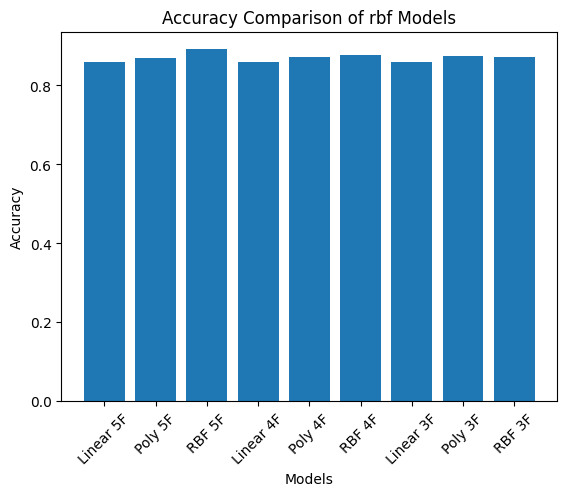

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Calculate accuracies for each model
accuracies = [accuracyL5, accuracyP5, accuracyR5, accuracyL4, accuracyP4, accuracyR4,
              accuracyL3, accuracyP3, accuracyR3]

# Plot the accuracies
model_names = ['Linear 5F', 'Poly 5F', 'RBF 5F', 'Linear 4F', 'Poly 4F', 'RBF 4F',
               'Linear 3F', 'Poly 3F', 'RBF 3F']
plt.bar(model_names, accuracies)
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison of rbf Models')

# Rotate the x-axis tick labels by 45 degrees
plt.xticks(rotation=45)

plt.show()


## Since Rbf highest accuracy, we select Rbf as our final SVM model

### 2 best features


In [ ]:
# Trying different features
X = df[['sulphates', 'alcohol']]
y = df['quality_binary']

In [ ]:
# Split the data into training (70%) and testing sets (30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# Train the SVM model
model = svm.SVC()
model.fit(X_train, y_train)

SVC()

In [ ]:
# Make predictions on the test set
predictions = model.predict(X_test)
predictions

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [ ]:
# Calculate accuracy
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)

# Calculate precision
precision = precision_score(y_test, predictions)
print("Precision:", precision)

# Calculate recall
recall = recall_score(y_test, predictions)
print("Recall:", recall)

# Calculate F1 score
f1 = f1_score(y_test, predictions)
print("F1 Score:", f1)

# Calculate confusion matrix
confusion_mat = confusion_matrix(y_test, predictions)
print("Confusion Matrix:\n", confusion_mat)

Accuracy: 0.8604166666666667
Precision: 0.5
Recall: 0.11940298507462686
F1 Score: 0.19277108433734938
Confusion Matrix:
 [[405   8]
 [ 59   8]]


### 3 Features

In [ ]:
# Trying different features
X = df[['fixed acidity','sulphates', 'alcohol']]
y = df['quality_binary']

In [ ]:
# Split the data into training (70%) and testing sets (30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# Train the SVM model
model = svm.SVC()
model.fit(X_train, y_train)

SVC()

In [ ]:
# Make predictions on the test set
predictions = model.predict(X_test)
predictions

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [ ]:
# Calculate accuracy
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)

# Calculate precision
precision = precision_score(y_test, predictions)
print("Precision:", precision)

# Calculate recall
recall = recall_score(y_test, predictions)
print("Recall:", recall)

# Calculate F1 score
f1 = f1_score(y_test, predictions)
print("F1 Score:", f1)

# Calculate confusion matrix
confusion_mat = confusion_matrix(y_test, predictions)
print("Confusion Matrix:\n", confusion_mat)

Accuracy: 0.8770833333333333
Precision: 0.6538461538461539
Recall: 0.2537313432835821
F1 Score: 0.3655913978494624
Confusion Matrix:
 [[404   9]
 [ 50  17]]


### 4 Features

In [ ]:
# Trying different features
X = df[['fixed acidity','sulphates', 'alcohol','total sulfur dioxide']]
y = df['quality_binary']

In [ ]:
# Split the data into training (70%) and testing sets (30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# Train the SVM model
model = svm.SVC()
model.fit(X_train, y_train)

SVC()

In [ ]:
# Make predictions on the test set
predictions = model.predict(X_test)
predictions

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [ ]:
# Calculate accuracy
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)

# Calculate precision
precision = precision_score(y_test, predictions)
print("Precision:", precision)

# Calculate recall
recall = recall_score(y_test, predictions)
print("Recall:", recall)

# Calculate F1 score
f1 = f1_score(y_test, predictions)
print("F1 Score:", f1)

# Calculate confusion matrix
confusion_mat = confusion_matrix(y_test, predictions)
print("Confusion Matrix:\n", confusion_mat)

Accuracy: 0.8770833333333333
Precision: 0.6666666666666666
Recall: 0.23880597014925373
F1 Score: 0.3516483516483516
Confusion Matrix:
 [[405   8]
 [ 51  16]]


### 5 Features

In [ ]:
# Trying different features
X = df[['fixed acidity','sulphates', 'alcohol','total sulfur dioxide', 'pH']]
y = df['quality_binary']

In [ ]:
# Split the data into training (70%) and testing sets (30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# Train the SVM model
model = svm.SVC()
model.fit(X_train, y_train)

SVC()

In [ ]:
# Make predictions on the test set
predictions = model.predict(X_test)
predictions

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [ ]:
# Calculate accuracy
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)

# Calculate precision
precision = precision_score(y_test, predictions)
print("Precision:", precision)

# Calculate recall
recall = recall_score(y_test, predictions)
print("Recall:", recall)

# Calculate F1 score
f1 = f1_score(y_test, predictions)
print("F1 Score:", f1)

# Calculate confusion matrix
confusion_mat = confusion_matrix(y_test, predictions)
print("Confusion Matrix:\n", confusion_mat)

Accuracy: 0.8791666666666667
Precision: 0.68
Recall: 0.2537313432835821
F1 Score: 0.3695652173913044
Confusion Matrix:
 [[405   8]
 [ 50  17]]


### 6 Features

In [ ]:
# Trying different features
X = df[['fixed acidity','sulphates', 'alcohol','total sulfur dioxide', 'pH', 'density']]
y = df['quality_binary']

In [ ]:
# Split the data into training (70%) and testing sets (30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# Train the SVM model
model = svm.SVC()
model.fit(X_train, y_train)

SVC()

In [ ]:
# Make predictions on the test set
predictions = model.predict(X_test)
predictions

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [ ]:
# Calculate accuracy
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)

# Calculate precision
precision = precision_score(y_test, predictions)
print("Precision:", precision)

# Calculate recall
recall = recall_score(y_test, predictions)
print("Recall:", recall)

# Calculate F1 score
f1 = f1_score(y_test, predictions)
print("F1 Score:", f1)

# Calculate confusion matrix
confusion_mat = confusion_matrix(y_test, predictions)
print("Confusion Matrix:\n", confusion_mat)

Accuracy: 0.8791666666666667
Precision: 0.68
Recall: 0.2537313432835821
F1 Score: 0.3695652173913044
Confusion Matrix:
 [[405   8]
 [ 50  17]]


### 7 Features

In [ ]:
# Trying different features
X = df[['fixed acidity','sulphates', 'alcohol','total sulfur dioxide', 'pH', 'density', 'chlorides']]
y = df['quality_binary']

In [ ]:
# Split the data into training (70%) and testing sets (30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# Train the SVM model
model = svm.SVC()
model.fit(X_train, y_train)

SVC()

In [ ]:
# Make predictions on the test set
predictions = model.predict(X_test)
predictions

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,

In [ ]:
# Calculate accuracy
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)

# Calculate precision
precision = precision_score(y_test, predictions)
print("Precision:", precision)

# Calculate recall
recall = recall_score(y_test, predictions)
print("Recall:", recall)

# Calculate F1 score
f1 = f1_score(y_test, predictions)
print("F1 Score:", f1)

# Calculate confusion matrix
confusion_mat = confusion_matrix(y_test, predictions)
print("Confusion Matrix:\n", confusion_mat)

Accuracy: 0.8791666666666667
Precision: 0.6666666666666666
Recall: 0.26865671641791045
F1 Score: 0.3829787234042553
Confusion Matrix:
 [[404   9]
 [ 49  18]]


### 8 Features

In [ ]:
# Trying different features
X = df[['fixed acidity','sulphates', 'alcohol','total sulfur dioxide', 'pH', 'density', 'chlorides','residual sugar']]
y = df['quality_binary']

In [ ]:
# Split the data into training (70%) and testing sets (30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# Train the SVM model
model = svm.SVC()
model.fit(X_train, y_train)

SVC()

In [ ]:
# Make predictions on the test set
predictions = model.predict(X_test)
predictions

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [ ]:
# Calculate accuracy
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)

# Calculate precision
precision = precision_score(y_test, predictions)
print("Precision:", precision)

# Calculate recall
recall = recall_score(y_test, predictions)
print("Recall:", recall)

# Calculate F1 score
f1 = f1_score(y_test, predictions)
print("F1 Score:", f1)

# Calculate confusion matrix
confusion_mat = confusion_matrix(y_test, predictions)
print("Confusion Matrix:\n", confusion_mat)

Accuracy: 0.8791666666666667
Precision: 0.6666666666666666
Recall: 0.26865671641791045
F1 Score: 0.3829787234042553
Confusion Matrix:
 [[404   9]
 [ 49  18]]


### 9 Features

In [ ]:
# Trying different features
X = df[['fixed acidity','sulphates', 'alcohol','total sulfur dioxide', 'pH', 'density', 'chlorides','residual sugar', 'free sulfur dioxide']]
y = df['quality_binary']

In [ ]:
# Split the data into training (70%) and testing sets (30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# Train the SVM model
model = svm.SVC()
model.fit(X_train, y_train)

SVC()

In [ ]:
# Make predictions on the test set
predictions = model.predict(X_test)
predictions

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [ ]:
# Calculate accuracy
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)

# Calculate precision
precision = precision_score(y_test, predictions)
print("Precision:", precision)

# Calculate recall
recall = recall_score(y_test, predictions)
print("Recall:", recall)

# Calculate F1 score
f1 = f1_score(y_test, predictions)
print("F1 Score:", f1)

# Calculate confusion matrix
confusion_mat = confusion_matrix(y_test, predictions)
print("Confusion Matrix:\n", confusion_mat)

Accuracy: 0.88125
Precision: 0.7083333333333334
Recall: 0.2537313432835821
F1 Score: 0.3736263736263737
Confusion Matrix:
 [[406   7]
 [ 50  17]]


### 10 Features

In [ ]:
# Trying different features
X = df[['fixed acidity','sulphates', 'alcohol','total sulfur dioxide', 'pH', 'density', 'chlorides','residual sugar', 'free sulfur dioxide','free sulfur dioxide']]
y = df['quality_binary']

In [ ]:
# Split the data into training (70%) and testing sets (30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# Train the SVM model
model = svm.SVC()
model.fit(X_train, y_train)

SVC()

In [ ]:
# Make predictions on the test set
predictions = model.predict(X_test)
predictions

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [ ]:
# Calculate accuracy
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)

# Calculate precision
precision = precision_score(y_test, predictions)
print("Precision:", precision)

# Calculate recall
recall = recall_score(y_test, predictions)
print("Recall:", recall)

# Calculate F1 score
f1 = f1_score(y_test, predictions)
print("F1 Score:", f1)

# Calculate confusion matrix
confusion_mat = confusion_matrix(y_test, predictions)
print("Confusion Matrix:\n", confusion_mat)

Accuracy: 0.8791666666666667
Precision: 0.6956521739130435
Recall: 0.23880597014925373
F1 Score: 0.3555555555555555
Confusion Matrix:
 [[406   7]
 [ 51  16]]
